# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns

## Importing the data set

In [7]:
data_set = pd.read_csv("housing.csv")
print(data_set)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [8]:
x = data_set.iloc[:,1:].values
y = data_set.iloc[:,0].values

In [9]:
print(x)

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]


In [10]:
print(y)

[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  6440000  6419000  6405000  6300000  6300000  6300000
  6300000  6300000  6293000  6265000  6230000  6230000  6195000  6195000
  6195000  6160000  6160000  6125000  6107500  6090

# Taking care of missing data

In [11]:
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer.fit(x[:,0:4])
x[:,0:4] = imputer.transform(x[:,0:4])
print(x)

[[7420.0 4.0 2.0 ... 2 'yes' 'furnished']
 [8960.0 4.0 4.0 ... 3 'no' 'furnished']
 [9960.0 3.0 2.0 ... 2 'yes' 'semi-furnished']
 ...
 [3620.0 2.0 1.0 ... 0 'no' 'unfurnished']
 [2910.0 3.0 1.0 ... 0 'no' 'furnished']
 [3850.0 3.0 1.0 ... 0 'no' 'unfurnished']]


## Encoding categorical data

In [12]:
le = LabelEncoder()
for i in range(4,9):
    x[:,i]=le.fit_transform(x[:, i])
x[:,10] = le.fit_transform(x[:, 10])
df2 = pd.DataFrame(x,
                   columns=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'])
print(df2)

       area bedrooms bathrooms stories mainroad guestroom basement  \
0    7420.0      4.0       2.0     3.0        1         0        0   
1    8960.0      4.0       4.0     4.0        1         0        0   
2    9960.0      3.0       2.0     2.0        1         0        1   
3    7500.0      4.0       2.0     2.0        1         0        1   
4    7420.0      4.0       1.0     2.0        1         1        1   
..      ...      ...       ...     ...      ...       ...      ...   
540  3000.0      2.0       1.0     1.0        1         0        1   
541  2400.0      3.0       1.0     1.0        0         0        0   
542  3620.0      2.0       1.0     1.0        1         0        0   
543  2910.0      3.0       1.0     1.0        0         0        0   
544  3850.0      3.0       1.0     2.0        1         0        0   

    hotwaterheating airconditioning parking prefarea furnishingstatus  
0                 0               1       2        1        furnished  
1              

In [13]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])], remainder ='passthrough')
x = ct.fit_transform(x)

In [14]:
print(x)


[[1.0 0.0 0.0 ... 1 2 1]
 [1.0 0.0 0.0 ... 1 3 0]
 [0.0 1.0 0.0 ... 0 2 1]
 ...
 [0.0 0.0 1.0 ... 0 0 0]
 [1.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]]


In [15]:
x = x[:, 1:]

## Splitting the dataset into the Training set and Test set

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

## Training Multiple linear Regression Model on Training set

In [17]:
Regressor = LinearRegression()
Regressor.fit(x_train,y_train)

LinearRegression()

## Predict Test Result

In [18]:
y_predict = Regressor.predict(x_test)
print(y_predict)

[ 3950288.61876196  6173868.81883061  4483635.98836272  7258732.75105198
  2836727.58490499  7032947.0974906   3203851.47112406  3270994.00904074
  3472554.03645932  8289978.32623682  6605321.62954614  3723366.23684106
  3812376.95976104  4548966.84544599  4020476.3484966   1969836.22090165
  4057262.98087856  3704586.86711732  3282767.93188815  4609423.64909571
  5968243.73637128  6363698.62063799  4751300.32389003  2659595.27633066
  5305573.24662102  5680819.58784482  5404106.90027122  5543050.5219253
  5768360.4798223   5801753.70839269  3389277.96110617  6399092.02678457
  7081030.31411738  2913042.40387681  4498664.01335446  5210561.68059354
  5013457.84122302  3707596.71347599  2916603.45485358  3937761.75634098
  8041334.20180879  4942174.6114205   6432605.21981742  3511338.78156419
  3813475.39540813  6434856.19540018  4447687.02885148  2696243.71724915
  4180018.706258    6455973.25779215  4056226.34306799  7124571.30073128
  2530661.67791795  3033278.46419645  3500830.320628

In [19]:
df = pd.DataFrame({"Acctual value":y_test,"predicted value":np.round(y_predict, 2),"difference":y_test-np.round(y_predict, 2)})

In [20]:
print(df)

     Acctual value  predicted value  difference
0          4585000       3950288.62   634711.38
1          6083000       6173868.82   -90868.82
2          4007500       4483635.99  -476135.99
3          6930000       7258732.75  -328732.75
4          2940000       2836727.58   103272.42
..             ...              ...         ...
104        6650000       7340959.28  -690959.28
105        5810000       5235408.60   574591.40
106        4123000       4134159.03   -11159.03
107        3080000       5058911.23 -1978911.23
108        5530000       6279957.32  -749957.32

[109 rows x 3 columns]


## Building the optimal model using Backward Elimination

In [21]:
x = np.append(arr = np.ones((545, 1)).astype(int), values = x, axis = 1)
print(x)

[[1 0.0 0.0 ... 1 2 1]
 [1 0.0 0.0 ... 1 3 0]
 [1 1.0 0.0 ... 0 2 1]
 ...
 [1 0.0 1.0 ... 0 0 0]
 [1 0.0 0.0 ... 0 0 0]
 [1 0.0 1.0 ... 0 0 0]]


In [22]:
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
x_opt = x_opt.astype(np.float64)
print(x_opt)

[[1.00e+00 0.00e+00 0.00e+00 7.42e+03 4.00e+00 2.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 8.96e+03 4.00e+00 4.00e+00]
 [1.00e+00 1.00e+00 0.00e+00 9.96e+03 3.00e+00 2.00e+00]
 ...
 [1.00e+00 0.00e+00 1.00e+00 3.62e+03 2.00e+00 1.00e+00]
 [1.00e+00 0.00e+00 0.00e+00 2.91e+03 3.00e+00 1.00e+00]
 [1.00e+00 0.00e+00 1.00e+00 3.85e+03 3.00e+00 1.00e+00]]


In [23]:
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           5.59e-82
Time:                        12:40:16   Log-Likelihood:                -8447.2
No. Observations:                 545   AIC:                         1.691e+04
Df Residuals:                     539   BIC:                         1.693e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.696e+05   2.92e+05      1.607      0.109   -1.04e+05    1.04e+06
x1         -2.808e+05   1.42e+05     -1.983      0.048   -5.59e+05   -2620.471
x2          -7.93e+05   1.52e+05     -5.234      0.000   -1.09e+06   -4.95e+05
x3           358.8673     26.769     13.406      0.000     306.283     411.451
x4          3.756e+05   8.26e+04      4.546      0.000    2.13e+05    5.38e+05
x5           1.33e+06   1.22e+05     10.869      0.000    1.09e+06    1.57e+06
==============================================================================
Omnibus:                       75.630   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.634
Skew:                           0.789   Prob(JB):                     7.18e-34
Kurtosis:                       5.058   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x_opt = x[:, [0, 1, 3, 4, 5]]
x_opt = x_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.72e-77
Time:                        12:40:16   Log-Likelihood:                -8460.7
No. Observations:                 545   AIC:                         1.693e+04
Df Residuals:                     540   BIC:                         1.695e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.229e+05   2.67e+05     -0.835      0.404   -7.47e+05    3.01e+05
x1          1.589e+05   1.17e+05      1.361      0.174   -7.05e+04    3.88e+05
x2           378.8844     27.134     13.963      0.000     325.583     432.186
x3           4.02e+05   8.45e+04      4.759      0.000    2.36e+05    5.68e+05
x4          1.384e+06   1.25e+05     11.080      0.000    1.14e+06    1.63e+06
==============================================================================
Omnibus:                       74.733   Durbin-Watson:                   0.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.197
Skew:                           0.768   Prob(JB):                     1.21e-34
Kurtosis:                       5.126   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
x_opt = x[:, [0, 3, 4, 5]]
x_opt = x_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     171.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           4.80e-78
Time:                        12:40:16   Log-Likelihood:                -8461.6
No. Observations:                 545   AIC:                         1.693e+04
Df Residuals:                     541   BIC:                         1.695e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.732e+05   2.65e+05     -0.655      0.513   -6.93e+05    3.47e+05
x1           378.7628     27.155     13.948      0.000     325.420     432.105
x2          4.068e+05   8.45e+04      4.817      0.000    2.41e+05    5.73e+05
x3          1.386e+06   1.25e+05     11.089      0.000    1.14e+06    1.63e+06
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.930
Skew:                           0.738   Prob(JB):                     9.19e-32
Kurtosis:                       5.029   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
x_opt = x[:, [0, 3, 5]]
x_opt = x_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     235.6
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.32e-74
Time:                        12:40:16   Log-Likelihood:                -8473.0
No. Observations:                 545   AIC:                         1.695e+04
Df Residuals:                     542   BIC:                         1.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.992e+05   1.97e+05      3.554      0.000    3.13e+05    1.09e+06
x1           390.1749     27.600     14.137      0.000     335.958     444.391
x2            1.6e+06   1.19e+05     13.422      0.000    1.37e+06    1.83e+06
==============================================================================
Omnibus:                       84.006   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.089
Skew:                           0.840   Prob(JB):                     2.88e-40
Kurtosis:                       5.280   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
x_opt = x[:, [0, 3]]
x_opt = x_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           7.39e-42
Time:                        12:40:16   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.000    2.04e+06    2.73e+06
x1           461.9749     31.226     14.795      0.000     400.637     523.313
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
print(x_opt)

[[1.00e+00 7.42e+03]
 [1.00e+00 8.96e+03]
 [1.00e+00 9.96e+03]
 ...
 [1.00e+00 3.62e+03]
 [1.00e+00 2.91e+03]
 [1.00e+00 3.85e+03]]


In [29]:
%matplotlib inline

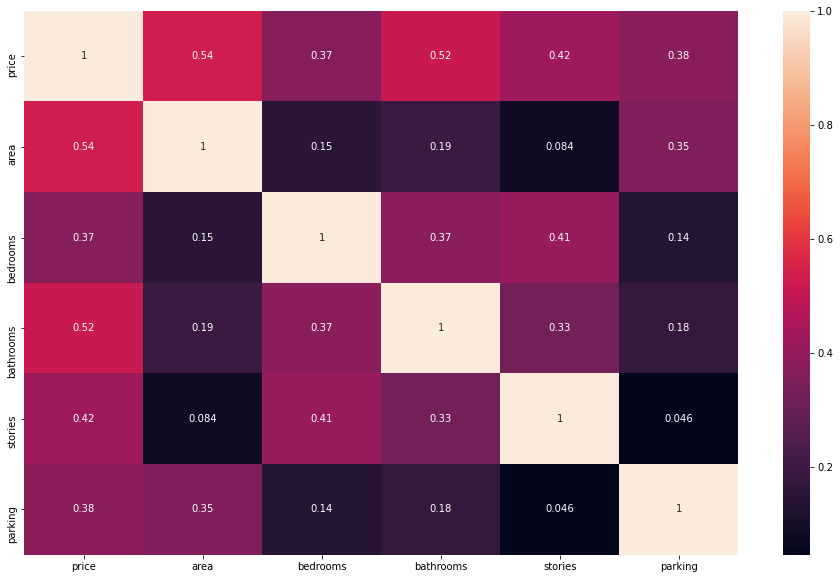

In [30]:
plt.figure(figsize = (16,10))
sns.heatmap(data_set.corr(),annot= True)
plt.show()